In [59]:
import _3dTo2dSetup as D3
import numpy as np
from lineRenderAlgo import Bresenham3D
import math
import cv2

In [60]:
SRC_TO_DETECTOR = 1167
SRC_TO_PATIENT = 705
DETECTOR_TO_PATIENT = SRC_TO_DETECTOR - SRC_TO_PATIENT
# used to determine box dimensions for projections
#MAG_FACTOR = SRC_TO_DETECTOR/SRC_TO_PATIENT
IMAGE_DIM = 735  # scale image dim down 1 to get centered image (since uneven)
#BOX_DIM = math.ceil(IMAGE_DIM/MAG_FACTOR)  # ~ 445
HALF_IMAGE_DIM = int((IMAGE_DIM - 1) / 2)


In [61]:
#steps 2 day

# 1 - create points 2 loop through and an image coresponding to said points
# 2 - preform bresenham between image and "forsviningspunkt"
# 3 - check if any points along said line are colored then color image repeat 2
# 4 - save image in folder to be used later


In [62]:
#create image with corrds
img_coords = np.empty([IMAGE_DIM,IMAGE_DIM],dtype=object)

for x in range(IMAGE_DIM):
  for y in range(IMAGE_DIM):
    img_coords[x,y] = (HALF_IMAGE_DIM-x, HALF_IMAGE_DIM-y)



In [63]:
path = r"3dTo2d\solid_400001.nrrd"
box = D3.get3dFigure(445,path)
box = D3.rotatePrimSecond(box,-87,27)
box = np.where(box > 0.5, 1, 0)
#sel_angles = [(-87,27),(-75,-22),(0,0),(87,-27),(87,27),(-43,13),(-43,-11),(43,-13),(43,13)]


In [64]:
box.shape
#box2 = np.ones([445, 445,445])
##box2.shape

(445, 445, 445)

In [65]:
#preform bresenham -> locate box -> check if points in box are colored
d_to_p, s_to_p, box_dim = DETECTOR_TO_PATIENT,SRC_TO_PATIENT,445

#box = np.ones([box_dim, box_dim,box_dim])
img = np.zeros([IMAGE_DIM,IMAGE_DIM])

box_dim_half = int((box_dim - 1) / 2)

#loop all image coords
for x in range(IMAGE_DIM):#-IMAGE_DIM+3):
  for y in range(IMAGE_DIM):#-IMAGE_DIM+3):
    #create line of points
    points = Bresenham3D(-d_to_p, 0, 0, s_to_p,img_coords[x, y][0], img_coords[x, y][1])
    #get points within box
    points_in_box = D3.getPointsInBox(points,box_dim)
    #check if any points in box are colord/a figure
    #print(points)
    #print("-.-----")
    #print(points_in_box)
    #print("-.-----")
    for i in points_in_box:
      #convert real coord to box coord
      xb = i[0] + box_dim_half
      yb = i[1] + box_dim_half
      zb = i[2] + box_dim_half

      #print(xb,yb,zb)
      if (box[xb,yb,zb] == 1):
        #if point found just go next
        img[x,y] = int(1)
        #print("placed")
        break
  print("done with;", x, end="\r")

    


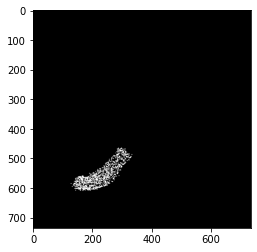

In [ ]:
import matplotlib.pyplot as plt

#plt.imshow(box[100],cmap="gray")
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
img = np.rot90(img, k = 3)
cv2.imwrite("3dTo2d/orthogonal_view.png",(np.where(img == 1,255,0)))

True